<a href="https://colab.research.google.com/github/Ayllinice/Filin_AI_Labs/blob/main/Ai_laba_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Импорта данных и библиотек.

In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
##3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
##5
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt



path_to_dataset = '/content/marketing_campaign.csv'
row_data = pd.read_csv(path_to_dataset, sep='\t')
data = row_data.copy()

# 2. Определение задачи
Поскольку целевая переменная принимает два значения (0 или 1), это задача бинарной классификации

# 3. Предобработка данных

In [ ]:
date_target = 'Dt_Customer'
data[date_target] = pd.to_datetime(row_data[date_target], format='%d-%m-%Y')

# Нахождение минимальной даты в датасете
min_date = data[date_target].min()
#print(min_date)
# Вычисление количества дней, прошедших от минимальной даты
data[date_target] = (data[date_target] - min_date).dt.days
#print(data[date_target])

# Разделение данных на признаки (X) и целевую переменную (y)
target = 'Response'
X = data.drop(target, axis=1)
y = data[target]

# Разделение на тренировочную и тестовую выборки (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Просмотр типов данных
#print(data.dtypes)

# Выделение признаков
numerical_features = list(X.select_dtypes(include=['int64', 'float64']).columns)
categorical_features = list(X.select_dtypes(include=['object', 'category']).columns)

#print("Числовые признаки:", numerical_features)
#print("Категориальные признаки:", categorical_features)


# Проверка наличия пропусков
#print(X_train.isnull().sum())

# Заполнение пропусков для числовых признаков
for numerical_feature in numerical_features:
  X_train[numerical_feature].fillna(X_train[numerical_feature].mean(), inplace=True)
  X_test[numerical_feature].fillna(X_train[numerical_feature].mean(), inplace=True)

# Заполнение пропусков для категориальных признаков
for categorical_feature in categorical_features:
  X_train[categorical_feature].fillna(X_train[categorical_feature].mode()[0], inplace=True)
  X_test[categorical_feature].fillna(X_train[categorical_feature].mode()[0], inplace=True)

#print(X_train.isnull().sum())


# Инициализация скейлера
scaler = StandardScaler()

# Нормализация числовых признаков
for numerical_feature in numerical_features:
  X_train[[numerical_feature]] = scaler.fit_transform(X_train[[numerical_feature]])
  X_test[[numerical_feature]] = scaler.transform(X_test[[numerical_feature]])



# Инициализация кодировщика
label_encoder = LabelEncoder()

# Кодирование категориального признака
for categorical_feature in categorical_features:
  X_train[categorical_feature] = label_encoder.fit_transform(X_train[categorical_feature])
  X_test[categorical_feature] = label_encoder.transform(X_test[categorical_feature])

<ipython-input-4-43b8b5f51dae>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[numerical_feature].fillna(X_train[numerical_feature].mean(), inplace=True)
<ipython-input-4-43b8b5f51dae>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

# 4. Обучение моделей


### A. Линейная модель (LogisticRegression)



In [ ]:
from sklearn.linear_model import LogisticRegression

# Инициализация модели
log_reg = LogisticRegression()

# Обучение модели
log_reg.fit(X_train, y_train)

LogisticRegression()

### B. Деревянная модель (DecisionTreeClassifier)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Инициализация модели с разными глубинами
tree_model_1 = DecisionTreeClassifier(max_depth=3)
tree_model_2 = DecisionTreeClassifier(max_depth=5)

# Обучение моделей
tree_model_1.fit(X_train, y_train)
tree_model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

### C. K-ближайших соседей (KNeighborsClassifier)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели с разными k
knn_model_1 = KNeighborsClassifier(n_neighbors=3)
knn_model_2 = KNeighborsClassifier(n_neighbors=5)

# Обучение моделей
knn_model_1.fit(X_train, y_train)
knn_model_2.fit(X_train, y_train)

KNeighborsClassifier()

### D. Случайный лес (RandomForestClassifier)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Инициализация модели
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 5. Оценка моделей


---- Линейная модель ----
Train Accuracy: 0.8923
Test Accuracy: 0.8705
Train ROC-AUC: 0.7091
Test ROC-AUC: 0.6449
Train F1-score: 0.5522
Test F1-score: 0.4314


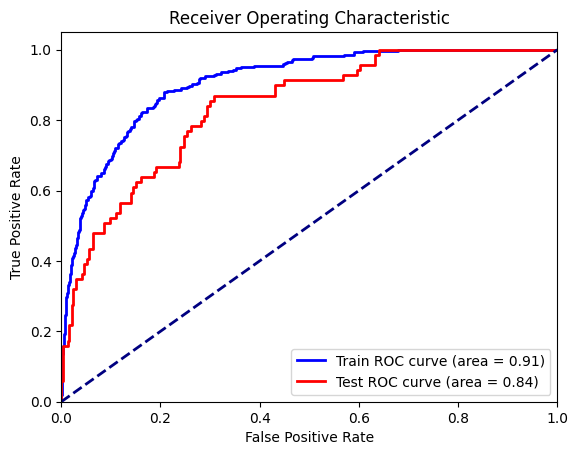

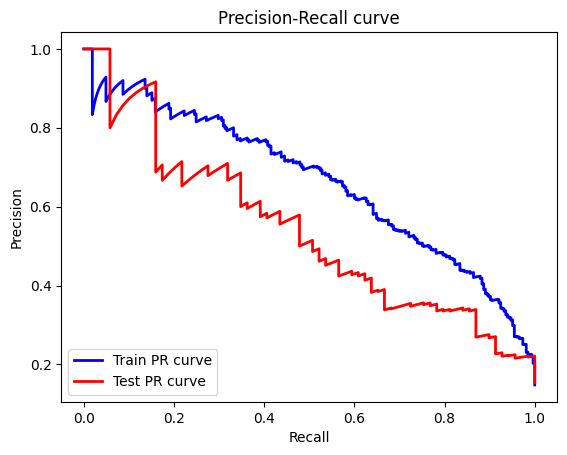

---- Деревянная модель (Глубина: 3) ----
Train Accuracy: 0.8878
Test Accuracy: 0.8460
Train ROC-AUC: 0.6753
Test ROC-AUC: 0.5711
Train F1-score: 0.4962
Test F1-score: 0.2581


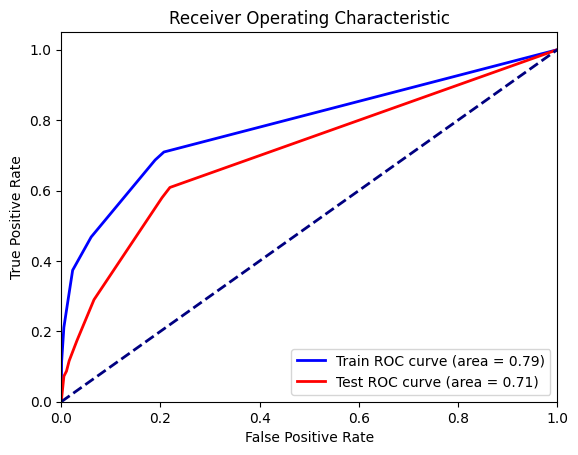

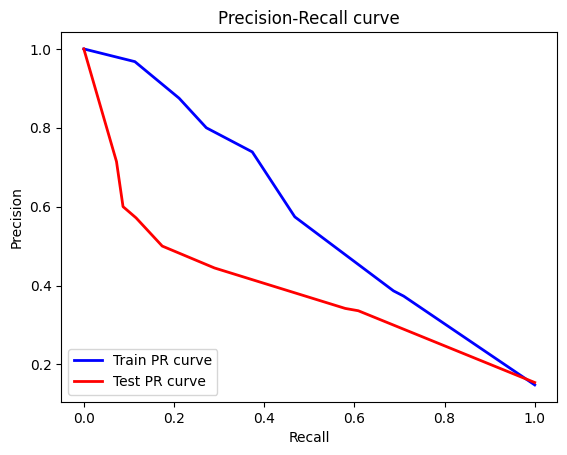

---- Деревянная модель (Глубина: 5) ----
Train Accuracy: 0.9129
Test Accuracy: 0.8594
Train ROC-AUC: 0.7353
Test ROC-AUC: 0.6027
Train F1-score: 0.6214
Test F1-score: 0.3368


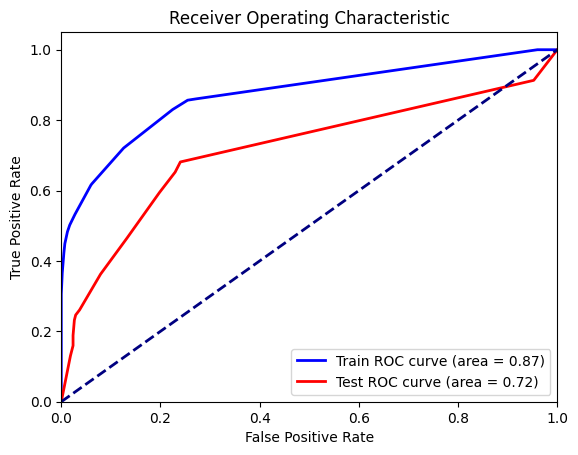

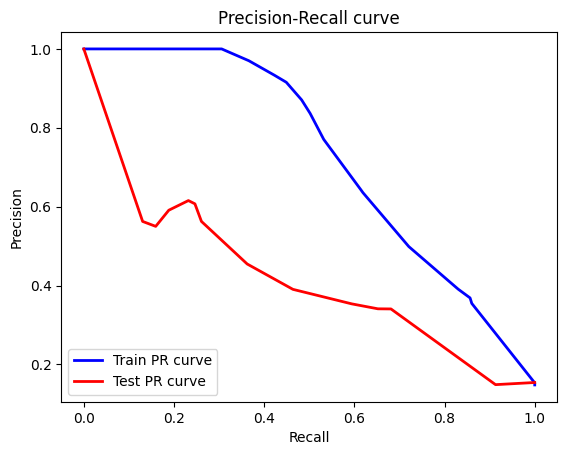

---- K-ближайших соседей (Кол-во: 3) ----
Train Accuracy: 0.9174
Test Accuracy: 0.8371
Train ROC-AUC: 0.7847
Test ROC-AUC: 0.5896
Train F1-score: 0.6810
Test F1-score: 0.3048


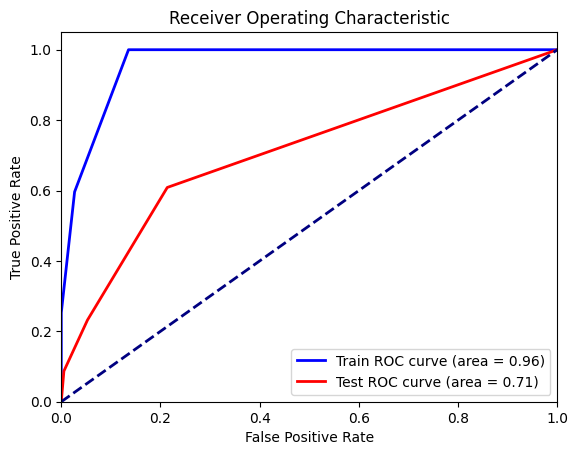

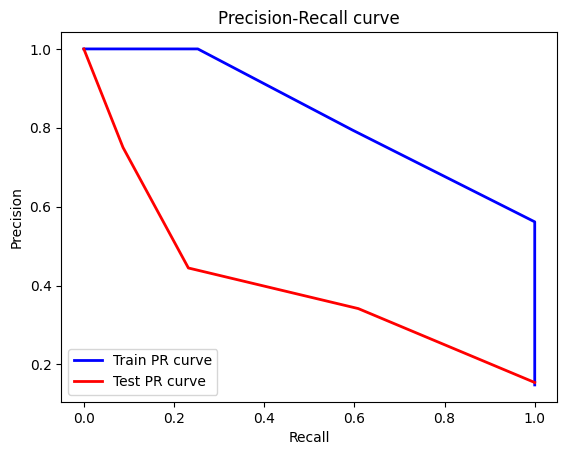

---- K-ближайших соседей (Кол-во: 5) ----
Train Accuracy: 0.9113
Test Accuracy: 0.8438
Train ROC-AUC: 0.7405
Test ROC-AUC: 0.5698
Train F1-score: 0.6241
Test F1-score: 0.2553


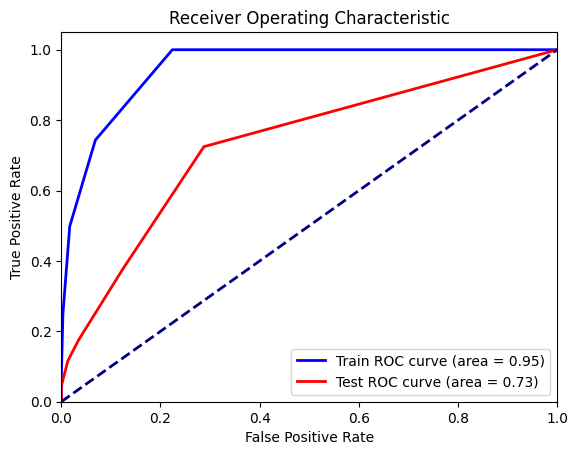

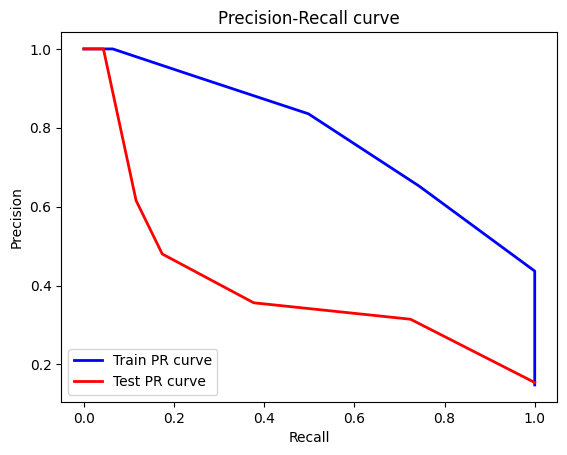

---- Случайный лес ----
Train Accuracy: 1.0000
Test Accuracy: 0.8661
Train ROC-AUC: 1.0000
Test ROC-AUC: 0.6186
Train F1-score: 1.0000
Test F1-score: 0.3750


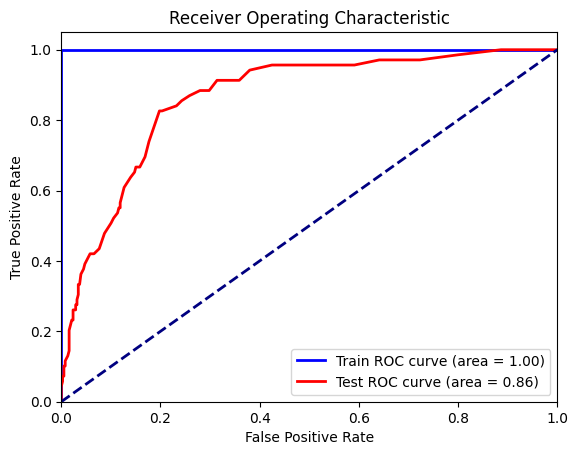

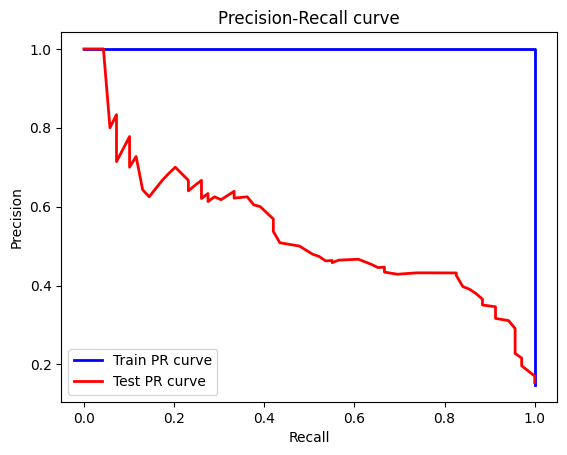

In [ ]:


# Функция для вычисления и вывода метрик
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    print('----',model_name, '----')
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_roc_auc = roc_auc_score(y_train, y_train_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Train ROC-AUC: {train_roc_auc:.4f}")
    print(f"Test ROC-AUC: {test_roc_auc:.4f}")
    print(f"Train F1-score: {train_f1:.4f}")
    print(f"Test F1-score: {test_f1:.4f}")

    # ROC-кривая
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test = auc(fpr_test, tpr_test)

    plt.figure()
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # PR-кривая
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_prob)
    precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_prob)

    plt.figure()
    plt.plot(recall_train, precision_train, color='blue', lw=2, label='Train PR curve')
    plt.plot(recall_test, precision_test, color='red', lw=2, label='Test PR curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower left")
    plt.show()

# Оценка моделей
evaluate_model(log_reg, X_train, X_test, y_train, y_test, 'Линейная модель')
evaluate_model(tree_model_1, X_train, X_test, y_train, y_test, 'Деревянная модель (Глубина: 3)')
evaluate_model(tree_model_2, X_train, X_test, y_train, y_test, 'Деревянная модель (Глубина: 5)')
evaluate_model(knn_model_1, X_train, X_test, y_train, y_test, 'K-ближайших соседей (Кол-во: 3)')
evaluate_model(knn_model_2, X_train, X_test, y_train, y_test, 'K-ближайших соседей (Кол-во: 5)')
evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Случайный лес')

# 6. Вывод

Первая модель показывает наименьшую степень переобучения и лучшие результаты на тестовой выборке по сравнению с другими моделями.

В большинстве случаев метрики на тренировочной выборке значительно лучше, чем на тестовой. Это указывает на переобучение.

В некоторых случаях имеет место недообучение, особенно в моделях "Деревянная модель (Глубина: 3)" и "Случайный лес", где значения F1-score на тестовой выборке очень низкие (0.2581 и 0.3750 соответственно).

